# Premier League Prediction using Machine Learning 

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Extracting data
dataset=pd.read_excel('MainData.xlsx')
dataset2=pd.read_excel('PL_2019-20.xlsx')
dataset.head()

,Position,Name,PM,W,D,L,GF,GA,GD,CLS,...,Xg Conceded,Xg GD,Saves per Match,Big Chances Created,Big Chances Missed,Red Cards,Home W,Away W,Home L,xPTS
0,1,Man City,38,27,5,6,83,32,NaN,19,...,31.0,NaN,1.8,79,59,2,13,14,4,83.38
1,2,Man United,38,21,11,6,73,44,NaN,13,...,42.0,NaN,2.6,68,51,1,9,12,6,65.64
2,3,Liverpool,38,20,9,9,68,42,NaN,12,...,43.6,NaN,2.6,82,68,0,10,10,6,68.80
3,4,Chelsea,38,19,10,9,58,36,NaN,18,...,30.4,NaN,1.9,62,56,3,9,10,4,77.41
4,5,Leicester City,38,20,6,12,68,50,NaN,11,...,46.7,NaN,2.3,53,45,0,9,11,9,59.75


In [3]:
dataset.shape

(20, 22)

In [4]:
dataset.describe()

,Position,PM,W,D,L,GF,GA,GD,CLS,Possession,...,Xg Conceded,Xg GD,Saves per Match,Big Chances Created,Big Chances Missed,Red Cards,Home W,Away W,Home L,xPTS
count,20.00000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,0.0,20.000000,20.000000,...,20.000000,0.0,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,38.0,14.850000,8.300000,14.850000,51.200000,51.200000,NaN,11.200000,49.995000,...,49.785000,NaN,2.970000,50.650000,42.100000,2.40000,7.200000,7.650000,7.650000,52.696000
std,5.91608,0.0,5.869412,2.773939,5.593935,16.728796,11.251199,NaN,3.503382,7.945239,...,10.096913,NaN,0.695171,15.239405,10.676585,1.63514,2.745331,3.468277,2.476734,14.554609
min,1.00000,38.0,5.000000,2.000000,6.000000,20.000000,32.000000,NaN,5.000000,37.600000,...,30.400000,NaN,1.800000,28.000000,26.000000,0.00000,2.000000,2.000000,4.000000,29.590000
25%,5.75000,38.0,11.500000,7.000000,11.750000,39.000000,44.750000,NaN,9.000000,42.575000,...,43.525000,NaN,2.575000,38.750000,33.750000,1.00000,5.750000,5.000000,6.000000,42.592500
50%,10.50000,38.0,16.500000,8.000000,15.000000,51.000000,49.000000,NaN,11.500000,50.450000,...,50.350000,NaN,2.950000,46.500000,41.500000,2.50000,7.500000,8.500000,8.000000,52.895000
75%,15.25000,38.0,19.000000,9.250000,18.250000,63.500000,56.750000,NaN,12.000000,54.825000,...,56.375000,NaN,3.350000,60.500000,46.000000,3.00000,9.000000,10.000000,9.000000,60.165000
max,20.00000,38.0,27.000000,14.000000,29.000000,83.000000,76.000000,NaN,19.000000,63.700000,...,69.100000,NaN,4.500000,82.000000,68.000000,6.00000,13.000000,14.000000,13.000000,83.380000


In [5]:
dataset.index

RangeIndex(start=0, stop=20, step=1)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Position             20 non-null     int64  
 1   Name                 20 non-null     object 
 2   PM                   20 non-null     int64  
 3   W                    20 non-null     int64  
 4   D                    20 non-null     int64  
 5   L                    20 non-null     int64  
 6   GF                   20 non-null     int64  
 7   GA                   20 non-null     int64  
 8   GD                   0 non-null      float64
 9   CLS                  20 non-null     int64  
 10  Possession           20 non-null     float64
 11  Expected Goals (Xg)  20 non-null     float64
 12  Xg Conceded          20 non-null     float64
 13  Xg GD                0 non-null      float64
 14  Saves per Match      20 non-null     float64
 15  Big Chances Created  20 non-null     int64

In [7]:
dataset.isna().sum()

Position                0
Name                    0
PM                      0
W                       0
D                       0
L                       0
GF                      0
GA                      0
GD                     20
CLS                     0
Possession              0
Expected Goals (Xg)     0
Xg Conceded             0
Xg GD                  20
Saves per Match         0
Big Chances Created     0
Big Chances Missed      0
Red Cards               0
Home W                  0
Away W                  0
Home L                  0
xPTS                    0
dtype: int64

In [8]:
#Filling NAN values

dataset['GD'] = dataset['GF']-dataset['GA']
dataset2['GD'] = dataset2['GF']-dataset2['GA']

In [9]:
dataset.head()

,Position,Name,PM,W,D,L,GF,GA,GD,CLS,...,Xg Conceded,Xg GD,Saves per Match,Big Chances Created,Big Chances Missed,Red Cards,Home W,Away W,Home L,xPTS
0,1,Man City,38,27,5,6,83,32,51,19,...,31.0,NaN,1.8,79,59,2,13,14,4,83.38
1,2,Man United,38,21,11,6,73,44,29,13,...,42.0,NaN,2.6,68,51,1,9,12,6,65.64
2,3,Liverpool,38,20,9,9,68,42,26,12,...,43.6,NaN,2.6,82,68,0,10,10,6,68.80
3,4,Chelsea,38,19,10,9,58,36,22,18,...,30.4,NaN,1.9,62,56,3,9,10,4,77.41
4,5,Leicester City,38,20,6,12,68,50,18,11,...,46.7,NaN,2.3,53,45,0,9,11,9,59.75


In [10]:
# Filling NAN values in Xg GD

dataset['Xg GD'] = dataset['Expected Goals (Xg)']-dataset['Xg Conceded']
dataset2['Xg GD'] = dataset2['Expected Goals (Xg)']-dataset2['Xg Conceded']

In [11]:
dataset.head()

,Position,Name,PM,W,D,L,GF,GA,GD,CLS,...,Xg Conceded,Xg GD,Saves per Match,Big Chances Created,Big Chances Missed,Red Cards,Home W,Away W,Home L,xPTS
0,1,Man City,38,27,5,6,83,32,51,19,...,31.0,37.9,1.8,79,59,2,13,14,4,83.38
1,2,Man United,38,21,11,6,73,44,29,13,...,42.0,18.9,2.6,68,51,1,9,12,6,65.64
2,3,Liverpool,38,20,9,9,68,42,26,12,...,43.6,24.8,2.6,82,68,0,10,10,6,68.80
3,4,Chelsea,38,19,10,9,58,36,22,18,...,30.4,32.6,1.9,62,56,3,9,10,4,77.41
4,5,Leicester City,38,20,6,12,68,50,18,11,...,46.7,9.4,2.3,53,45,0,9,11,9,59.75


# Data Analysis

Teams with most wins, draws and losses

<AxesSubplot:xlabel='W', ylabel='Name'>

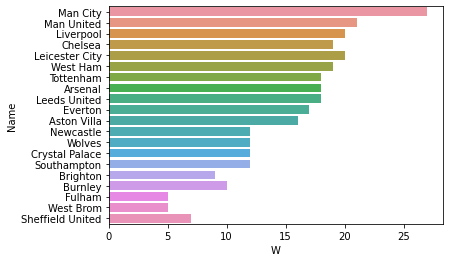

In [12]:
sns.barplot(x='W', y='Name', data=dataset)

In [13]:
y = dataset['D']
x = dataset['Name']

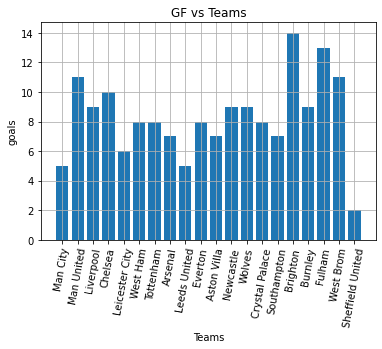

In [14]:
plt.bar(x,y)
plt.xlabel("Teams")
plt.grid()
plt.xticks(rotation = 80)
plt.ylabel("goals")
plt.title("D vs Teams")
plt.show()

<AxesSubplot:xlabel='L', ylabel='Name'>

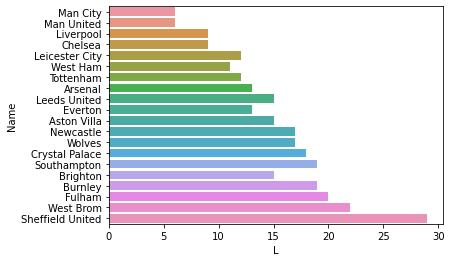

In [15]:
sns.barplot(x='L', y='Name', data=dataset)

#### Attacking Analysis 

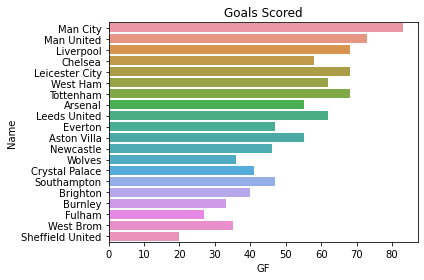

In [16]:
sns.barplot(data=dataset, y='Name', x='GF').set(title='Goals Scored')
#plt.xticks(rotation=70)
plt.tight_layout()

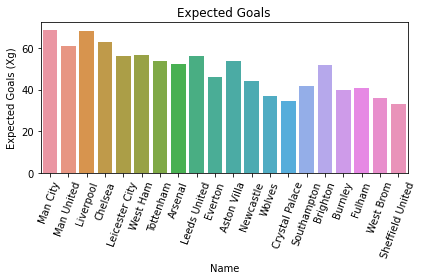

In [17]:
sns.barplot(data=dataset, x='Name', y='Expected Goals (Xg)').set(title='Expected Goals')
plt.xticks(rotation=70)
plt.tight_layout()

Difference between Goals scored and Xg to determine which team overperformed and which team underperformed in attack

In [18]:
dataset['GF_minus_Xg'] = dataset['GF']-dataset['Expected Goals (Xg)']
dataset.head()

,Position,Name,PM,W,D,L,GF,GA,GD,CLS,...,Xg GD,Saves per Match,Big Chances Created,Big Chances Missed,Red Cards,Home W,Away W,Home L,xPTS,GF_minus_Xg
0,1,Man City,38,27,5,6,83,32,51,19,...,37.9,1.8,79,59,2,13,14,4,83.38,14.1
1,2,Man United,38,21,11,6,73,44,29,13,...,18.9,2.6,68,51,1,9,12,6,65.64,12.1
2,3,Liverpool,38,20,9,9,68,42,26,12,...,24.8,2.6,82,68,0,10,10,6,68.80,-0.4
3,4,Chelsea,38,19,10,9,58,36,22,18,...,32.6,1.9,62,56,3,9,10,4,77.41,-5.0
4,5,Leicester City,38,20,6,12,68,50,18,11,...,9.4,2.3,53,45,0,9,11,9,59.75,11.9


<AxesSubplot:xlabel='Name'>

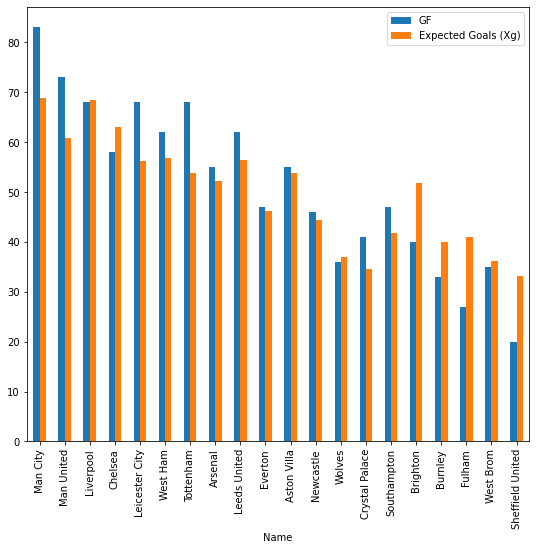

In [19]:
dataset.plot(x="Name", y=["GF","Expected Goals (Xg)"], kind="bar",figsize=(9,8))

##### Defending Analysis

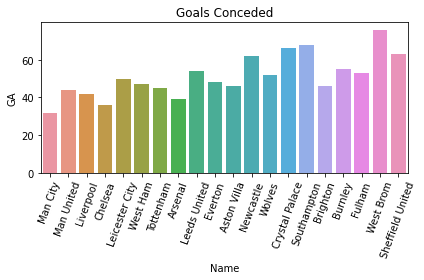

In [20]:
sns.barplot(data=dataset, x='Name', y='GA').set(title='Goals Conceded')
plt.xticks(rotation=70)
plt.tight_layout()

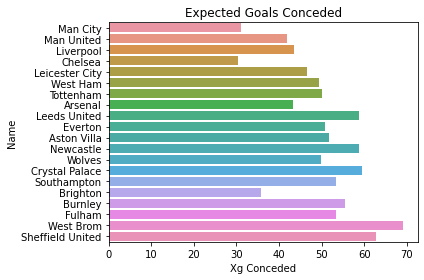

In [21]:
sns.barplot(data=dataset, y='Name', x='Xg Conceded').set(title='Expected Goals Conceded')
#plt.xticks(rotation=70)
plt.tight_layout()

Difference between Goals scored and Xg to determine which team overperformed and which team underperformed in attack

In [22]:
dataset['GA_minus_Xa'] = dataset['GA']-dataset['Xg Conceded']
dataset.head()

,Position,Name,PM,W,D,L,GF,GA,GD,CLS,...,Saves per Match,Big Chances Created,Big Chances Missed,Red Cards,Home W,Away W,Home L,xPTS,GF_minus_Xg,GA_minus_Xa
0,1,Man City,38,27,5,6,83,32,51,19,...,1.8,79,59,2,13,14,4,83.38,14.1,1.0
1,2,Man United,38,21,11,6,73,44,29,13,...,2.6,68,51,1,9,12,6,65.64,12.1,2.0
2,3,Liverpool,38,20,9,9,68,42,26,12,...,2.6,82,68,0,10,10,6,68.80,-0.4,-1.6
3,4,Chelsea,38,19,10,9,58,36,22,18,...,1.9,62,56,3,9,10,4,77.41,-5.0,5.6
4,5,Leicester City,38,20,6,12,68,50,18,11,...,2.3,53,45,0,9,11,9,59.75,11.9,3.3


<AxesSubplot:xlabel='Name'>

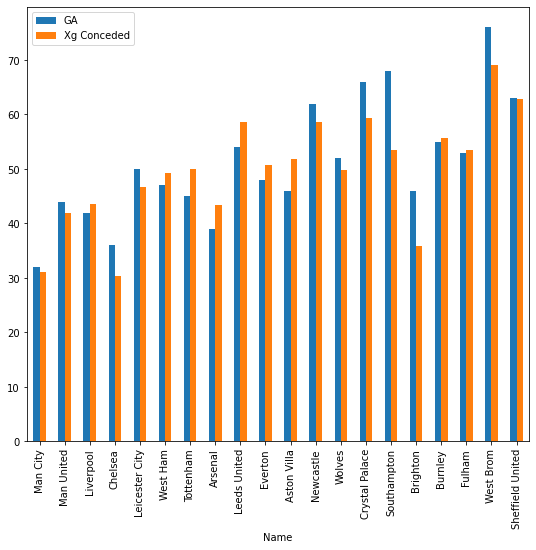

In [23]:
dataset.plot(x="Name", y=["GA","Xg Conceded"], kind="bar",figsize=(9,8))

Top 5 teams Possession Distribution 

In [24]:
newdf = dataset.head()

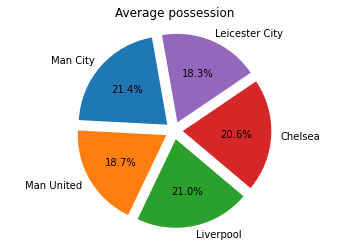

In [25]:
plt.pie(newdf['Possession'], labels = newdf['Name'],startangle=100, shadow = False, explode = (0.1, 0.1, 0.1, 0.1,0.1), autopct = "%.1f%%")
plt.grid()
#plt.xticks(rotation=40)
plt.title("Average possession")
plt.axis("equal")
plt.show()

##### Chances created vs Chances missed

<AxesSubplot:xlabel='Name'>

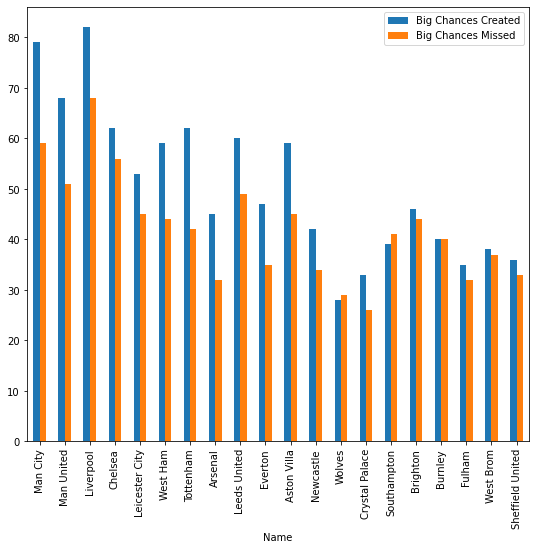

In [26]:
dataset.plot(x="Name", y=["Big Chances Created","Big Chances Missed"], kind="bar",figsize=(9,8))

#### Goal Difference vs Expected Goal Difference

Expected Goal Difference Xg GD = Xg - Xa

<AxesSubplot:xlabel='Name'>

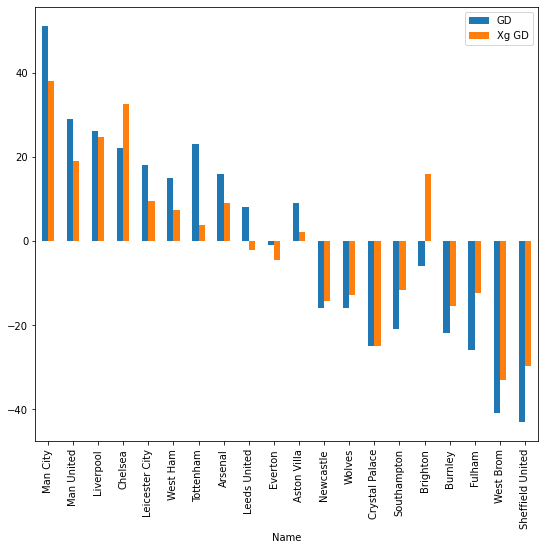

In [27]:
dataset.plot(x="Name", y=["GD","Xg GD"], kind="bar",figsize=(9,8))

In [28]:
dataset['GD_minus_XgD'] = dataset['GD'] - dataset['Xg GD']
dataset.head()

,Position,Name,PM,W,D,L,GF,GA,GD,CLS,...,Big Chances Created,Big Chances Missed,Red Cards,Home W,Away W,Home L,xPTS,GF_minus_Xg,GA_minus_Xa,GD_minus_XgD
0,1,Man City,38,27,5,6,83,32,51,19,...,79,59,2,13,14,4,83.38,14.1,1.0,13.1
1,2,Man United,38,21,11,6,73,44,29,13,...,68,51,1,9,12,6,65.64,12.1,2.0,10.1
2,3,Liverpool,38,20,9,9,68,42,26,12,...,82,68,0,10,10,6,68.80,-0.4,-1.6,1.2
3,4,Chelsea,38,19,10,9,58,36,22,18,...,62,56,3,9,10,4,77.41,-5.0,5.6,-10.6
4,5,Leicester City,38,20,6,12,68,50,18,11,...,53,45,0,9,11,9,59.75,11.9,3.3,8.6


Clean Sheets vs Saves Per Match Scatter plot

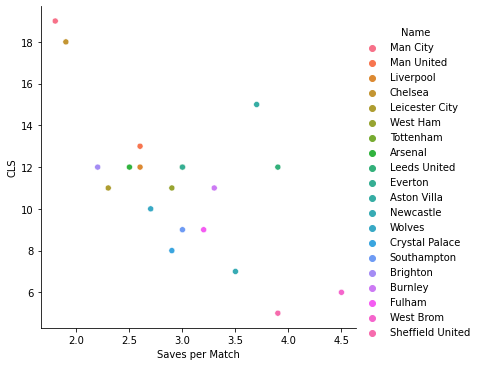

In [29]:
sns.relplot(x="Saves per Match", y="CLS", hue = 'Name',kind = 'scatter',data=dataset)
plt.show()

<AxesSubplot:xlabel='Red Cards', ylabel='Name'>

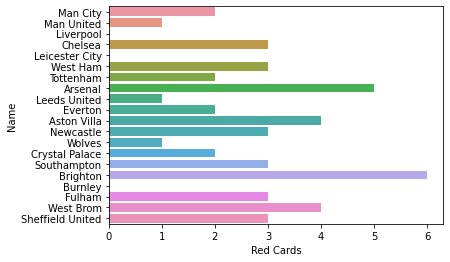

In [30]:
sns.barplot(x='Red Cards', y='Name', data=dataset)

#### Home Wins vs Loss Percentage

In [31]:
dataset['Home Win%'] = (dataset['Home W']/(dataset['PM']/2))*100  

In [32]:
dataset['Home Loss%'] = (dataset['Home L']/(dataset['PM']/2))*100  

In [33]:
dataset['Home D%'] = (((dataset['PM']/2) -(dataset['Home W']+dataset['Home L']))/(dataset['PM']/2))*100  

In [34]:
dataset.head()

,Position,Name,PM,W,D,L,GF,GA,GD,CLS,...,Home W,Away W,Home L,xPTS,GF_minus_Xg,GA_minus_Xa,GD_minus_XgD,Home Win%,Home Loss%,Home D%
0,1,Man City,38,27,5,6,83,32,51,19,...,13,14,4,83.38,14.1,1.0,13.1,68.421053,21.052632,10.526316
1,2,Man United,38,21,11,6,73,44,29,13,...,9,12,6,65.64,12.1,2.0,10.1,47.368421,31.578947,21.052632
2,3,Liverpool,38,20,9,9,68,42,26,12,...,10,10,6,68.80,-0.4,-1.6,1.2,52.631579,31.578947,15.789474
3,4,Chelsea,38,19,10,9,58,36,22,18,...,9,10,4,77.41,-5.0,5.6,-10.6,47.368421,21.052632,31.578947
4,5,Leicester City,38,20,6,12,68,50,18,11,...,9,11,9,59.75,11.9,3.3,8.6,47.368421,47.368421,5.263158


<AxesSubplot:xlabel='Name'>

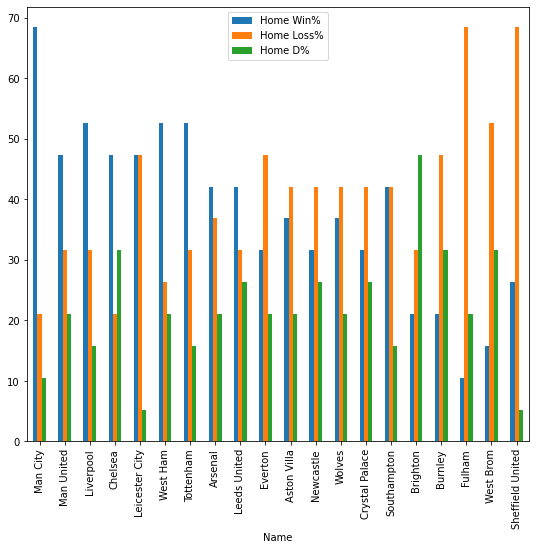

In [35]:
dataset.plot(x="Name", y=["Home Win%","Home Loss%" ,"Home D%"], kind="bar",figsize=(9,8))

Adding Total Points in this Dataset

In [36]:
dataset['Points'] = dataset['W']*3 + dataset['D']
dataset2['Points'] = dataset2['W']*3 + dataset2['D']
dataset.head()

,Position,Name,PM,W,D,L,GF,GA,GD,CLS,...,Away W,Home L,xPTS,GF_minus_Xg,GA_minus_Xa,GD_minus_XgD,Home Win%,Home Loss%,Home D%,Points
0,1,Man City,38,27,5,6,83,32,51,19,...,14,4,83.38,14.1,1.0,13.1,68.421053,21.052632,10.526316,86
1,2,Man United,38,21,11,6,73,44,29,13,...,12,6,65.64,12.1,2.0,10.1,47.368421,31.578947,21.052632,74
2,3,Liverpool,38,20,9,9,68,42,26,12,...,10,6,68.80,-0.4,-1.6,1.2,52.631579,31.578947,15.789474,69
3,4,Chelsea,38,19,10,9,58,36,22,18,...,10,4,77.41,-5.0,5.6,-10.6,47.368421,21.052632,31.578947,67
4,5,Leicester City,38,20,6,12,68,50,18,11,...,11,9,59.75,11.9,3.3,8.6,47.368421,47.368421,5.263158,66


### Finding Correlation between Pairs and Varaibles using Correlation Matrix

In [37]:
newdf2 = dataset.copy()

In [38]:
newdf2.drop(['PM','D','GF','GA','Expected Goals (Xg)','Xg Conceded','Big Chances Missed'],axis = 1, inplace = True)

In [39]:
newdf2.drop(['GD_minus_XgD','GF_minus_Xg','GA_minus_Xa','Red Cards', 'Saves per Match','Home W','Away W', 'Home L','Home Win%','Home D%','Home Loss%'],axis = 1, inplace = True)

In [40]:
newdf2.head()

,Position,Name,W,L,GD,CLS,Possession,Xg GD,Big Chances Created,xPTS,Points
0,1,Man City,27,6,51,19,63.7,37.9,79,83.38,86
1,2,Man United,21,6,29,13,55.8,18.9,68,65.64,74
2,3,Liverpool,20,9,26,12,62.4,24.8,82,68.80,69
3,4,Chelsea,19,9,22,18,61.4,32.6,62,77.41,67
4,5,Leicester City,20,12,18,11,54.5,9.4,53,59.75,66


<AxesSubplot:>

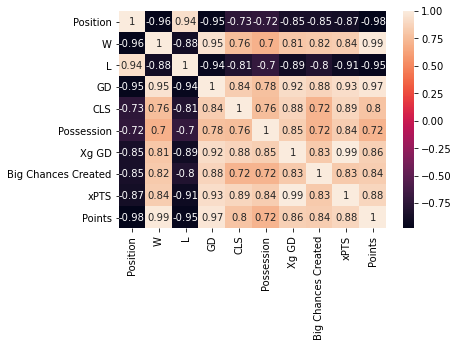

In [41]:
### Correlation matrix implementation

corr_mat=newdf2.corr()
sns.heatmap(corr_mat, annot=True)

# Data Preprocessing

Bottom 3 Teams Got Relegated so we Won't be using their Data as they won't be in the league this season

In [42]:
dataset.drop(['GD_minus_XgD','GF_minus_Xg','GA_minus_Xa', 'GD_minus_XgD','Home W','Away W', 'Home L','Home Win%','Home D%','Home Loss%'],axis = 1, inplace = True)
dataset.head()

,Position,Name,PM,W,D,L,GF,GA,GD,CLS,Possession,Expected Goals (Xg),Xg Conceded,Xg GD,Saves per Match,Big Chances Created,Big Chances Missed,Red Cards,xPTS,Points
0,1,Man City,38,27,5,6,83,32,51,19,63.7,68.9,31.0,37.9,1.8,79,59,2,83.38,86
1,2,Man United,38,21,11,6,73,44,29,13,55.8,60.9,42.0,18.9,2.6,68,51,1,65.64,74
2,3,Liverpool,38,20,9,9,68,42,26,12,62.4,68.4,43.6,24.8,2.6,82,68,0,68.80,69
3,4,Chelsea,38,19,10,9,58,36,22,18,61.4,63.0,30.4,32.6,1.9,62,56,3,77.41,67
4,5,Leicester City,38,20,6,12,68,50,18,11,54.5,56.1,46.7,9.4,2.3,53,45,0,59.75,66


In [43]:
dataset2

,Position,Name,PM,W,D,L,GF,GA,GD,CLS,Possession,Expected Goals (Xg),Xg Conceded,Xg GD,Saves per Match,Big Chances Created,Big Chances Missed,Red Cards,xPTS,Points
0,1,Liverpool,38,32,3,3,85,33,52,15,63.3,75.19,39.57,35.62,2.0,88,65,1,74.48,99
1,2,Man City,38,26,3,9,102,35,67,17,66.7,102.21,37.00,65.21,2.0,107,83,4,86.76,81
2,3,Man United,38,18,12,8,66,36,30,13,56.0,66.19,38.00,28.19,2.6,54,52,0,70.99,66
3,4,Chelsea,38,20,6,12,69,54,15,9,60.7,76.23,41.09,35.14,1.7,74,69,0,73.49,66
4,5,Leicester City,38,18,8,12,67,41,26,13,57.5,61.02,47.89,13.13,2.5,69,49,3,61.16,62
5,6,Tottenham,38,16,11,11,61,47,14,8,52.1,49.02,54.13,-5.11,3.7,48,35,2,49.26,59
6,7,Wolves,38,15,14,9,51,40,11,13,48.2,54.22,37.39,16.83,2.4,57,47,2,63.82,59
7,8,Arsenal,38,14,14,10,56,48,8,10,53.9,50.82,57.25,-6.43,3.9,47,30,5,50.15,56
8,9,Sheffield United,38,14,12,12,39,39,0,13,42.9,45.81,52.04,-6.23,2.7,60,48,2,49.34,54
9,10,Burnley,38,15,9,14,43,50,-7,15,41.5,49.35,53.84,-4.49,3.2,53,56,0,49.54,54


In [44]:
#mc = dataset.iloc[0,:]
#mu = dataset.iloc[1,:]
#liv = dataset.iloc[2,:]
#chel = dataset.iloc[3,:]
#lei = dataset.iloc[4,:]
#whu = dataset.iloc[5,:]
#tot = dataset.iloc[6,:]
#ars = dataset.iloc[7,:]
#leeds = dataset.iloc[8,:]
#eve = dataset.iloc[9,:]
#asv = dataset.iloc[10,:]
#new = dataset.iloc[11,:]
#wol = dataset.iloc[12,:]
#cp = dataset.iloc[13,:]
#sthm = dataset.iloc[14,:]
#brh = dataset.iloc[15,:]
#bur = dataset.iloc[16,:]
#ful = dataset.iloc[17,:]
#wbrom = dataset.iloc[18,:]
#sheff = dataset.iloc[19,:]

In [45]:
#mc.drop(labels = ['Name','Points'],inplace = True) 
#mu.drop(labels = ['Name','Position'],inplace = True) 
#liv.drop(labels = ['Name','Position'],inplace = True) 
#chel.drop(labels = ['Name','Position'],inplace = True) 
#lei.drop(labels = ['Name','Position'],inplace = True) 
#whu.drop(labels = ['Name','Position'],inplace = True) 
#tot.drop(labels = ['Name','Position'],inplace = True) 
#ars.drop(labels = ['Name','Position'],inplace = True) 
#leeds.drop(labels = ['Name','Position'],inplace = True) 
#eve.drop(labels = ['Name','Position'],inplace = True) 
#asv.drop(labels = ['Name','Position'],inplace = True) 
#new.drop(labels = ['Name','Position'],inplace = True) 
#wol.drop(labels = ['Name','Position'],inplace = True) 
#cp.drop(labels = ['Name','Position'],inplace = True) 
#sthm.drop(labels = ['Name','Position'],inplace = True) 
#brh.drop(labels = ['Name','Position'],inplace = True) 
#bur.drop(labels = ['Name','Position'],inplace = True) 
#ful.drop(labels = ['Name','Position'],inplace = True) 
#wbrom.drop(labels = ['Name','Position'],inplace = True) 
#sheff.drop(labels = ['Name','Position'],inplace = True) 


### Concatenation of dataset and dataset2 

In [46]:
dataset2['Position'] = [3,1,2,4,5,7,13,8,20,17,15,10,12,14,16,6,11,9,18,19]
dataset2 = dataset2.sort_values(by = ['Position'],  ascending = True)
dataset2.reset_index(drop = True,inplace = True)

In [47]:
dataset2['Name'].replace("Bournemouth", "Leeds United", inplace = True)
dataset2['Name'].replace("Sheffield United", "Brentford", inplace = True)
dataset['Name'].replace("Sheffield United", "Brentford", inplace = True)
dataset['Name'].replace("West Brom", "Watford", inplace = True)

In [48]:
array =dataset2['Name'] 

In [49]:
df = pd.concat([dataset, dataset2]).groupby('Position', as_index=False).mean()

In [50]:
df['Name'] = array
df = df[['Position','Name','PM','W','D','L','GF','GA','GD','CLS','Possession','Expected Goals (Xg)','Xg Conceded','Xg GD','Saves per Match','Big Chances Created','Big Chances Missed','Red Cards','xPTS','Points']]
df = df.sort_values(by = ['Points'], ascending = False)
df["Position"] = np.arange(1,21,1) 
df.head()

,Position,Name,PM,W,D,L,GF,GA,GD,CLS,Possession,Expected Goals (Xg),Xg Conceded,Xg GD,Saves per Match,Big Chances Created,Big Chances Missed,Red Cards,xPTS,Points
2,1,Liverpool,38.0,26.0,6.0,6.0,76.5,37.5,39.0,13.5,62.85,71.795,41.585,30.210,2.3,85.0,66.5,0.5,71.640,84.0
0,2,Man City,38.0,26.5,4.0,7.5,92.5,33.5,59.0,18.0,65.20,85.555,34.000,51.555,1.9,93.0,71.0,3.0,85.070,83.5
1,3,Man United,38.0,19.5,11.5,7.0,69.5,40.0,29.5,13.0,55.90,63.545,40.000,23.545,2.6,61.0,51.5,0.5,68.315,70.0
3,4,Chelsea,38.0,19.5,8.0,10.5,63.5,45.0,18.5,13.5,61.05,69.615,35.745,33.870,1.8,68.0,62.5,1.5,75.450,66.5
4,5,Leicester City,38.0,19.0,7.0,12.0,67.5,45.5,22.0,12.0,56.00,58.560,47.295,11.265,2.4,61.0,47.0,1.5,60.455,64.0


In [51]:
df

,Position,Name,PM,W,D,L,GF,GA,GD,CLS,Possession,Expected Goals (Xg),Xg Conceded,Xg GD,Saves per Match,Big Chances Created,Big Chances Missed,Red Cards,xPTS,Points
2,1,Liverpool,38.0,26.0,6.0,6.0,76.5,37.5,39.0,13.5,62.85,71.795,41.585,30.210,2.30,85.0,66.5,0.5,71.640,84.0
0,2,Man City,38.0,26.5,4.0,7.5,92.5,33.5,59.0,18.0,65.20,85.555,34.000,51.555,1.90,93.0,71.0,3.0,85.070,83.5
1,3,Man United,38.0,19.5,11.5,7.0,69.5,40.0,29.5,13.0,55.90,63.545,40.000,23.545,2.60,61.0,51.5,0.5,68.315,70.0
3,4,Chelsea,38.0,19.5,8.0,10.5,63.5,45.0,18.5,13.5,61.05,69.615,35.745,33.870,1.80,68.0,62.5,1.5,75.450,66.5
4,5,Leicester City,38.0,19.0,7.0,12.0,67.5,45.5,22.0,12.0,56.00,58.560,47.295,11.265,2.40,61.0,47.0,1.5,60.455,64.0
6,6,Tottenham,38.0,17.0,9.5,11.5,64.5,46.0,18.5,10.0,51.85,51.410,52.065,-0.655,3.35,55.0,38.5,2.0,51.620,60.5
7,7,Arsenal,38.0,16.0,10.5,11.5,55.5,43.5,12.0,11.0,53.80,51.510,50.275,1.235,3.20,46.0,31.0,5.0,54.435,58.5
9,8,Everton,38.0,15.0,9.0,14.0,45.5,52.0,-6.5,10.5,47.80,49.955,49.955,0.000,2.75,53.0,41.0,2.5,53.250,54.0
5,9,West Ham,38.0,14.5,8.5,15.0,55.5,54.5,1.0,9.0,43.40,52.885,58.810,-5.925,3.15,56.5,43.5,2.0,48.965,52.0
12,10,Wolves,38.0,13.5,11.5,13.0,43.5,46.0,-2.5,11.5,48.75,45.560,43.595,1.965,2.55,42.5,38.0,1.5,54.040,52.0


### Data Splitting

In [52]:
y = dataset2['Points']

In [53]:
x = dataset2.drop(['Name','Points','Position','GF','GA','Expected Goals (Xg)','Xg Conceded','Red Cards'],axis = 1)

In [54]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y, train_size=0.45, random_state=0)

In [55]:
from sklearn.linear_model import LinearRegression
algo1 = LinearRegression()

In [56]:
algo1.fit(x_train,y_train)

LinearRegression()

###### Splitting data for evaluation

In [57]:
x_test_for_eval = dataset.drop(['Name','Points','Position','GF','GA','Expected Goals (Xg)','Xg Conceded','Red Cards'],axis = 1)

In [58]:
y_test_for_eval = dataset['Points']

##### Predicting for evaluation

In [59]:
y_predicted_for_eval = algo1.predict(x_test_for_eval)

In [60]:
y_predicted_for_eval

array([78.96034041, 69.02493565, 63.62190625, 68.15782457, 66.76489951,
       61.131498  , 61.35162866, 66.02140329, 59.03361107, 59.43304388,
       56.35372191, 47.39135335, 53.70306627, 46.92505851, 50.22028561,
       50.17609952, 47.03815673, 39.29943589, 31.11315313, 34.28201368])

## Model Evaluation

In [61]:
tra_data_pred = algo1.predict(x_train)

In [62]:
from sklearn import metrics
r2_train = metrics.r2_score(y_train,tra_data_pred)
print(r2_train*100)

100.0


In [63]:
from sklearn import metrics
r2_test = metrics.r2_score(y_test_for_eval,y_predicted_for_eval)
print(r2_test*100)

86.7151247511712


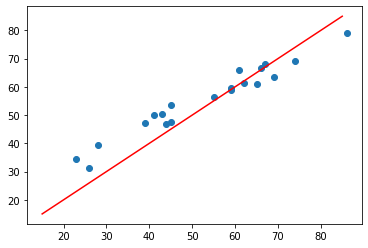

In [64]:
import matplotlib.pyplot as plt
m = 1
c = 0
x_line = np.arange(15,90,5)
y_line = m*x_line + c 
plt.plot(x_line,y_line,'r')
plt.scatter(y_test_for_eval , y_predicted_for_eval)
plt.show()

# Final Prediction

In [65]:
x_for_df_pred = df.drop(['Name','Points','Position','GF','GA','Expected Goals (Xg)','Xg Conceded','Red Cards'],axis = 1)

In [66]:
df['Predicted Points'] = algo1.predict(x_for_df_pred)

In [67]:
#df.head()

In [68]:
df = df.sort_values(by = ['Predicted Points'], ascending = False)

In [69]:
df["Position"] = np.arange(1,21,1) 

In [70]:
df.drop(['xPTS','PM','GF','W','L','D','GA','GD','CLS','Xg GD','Points','Expected Goals (Xg)','Possession','Xg Conceded','Xg GD','Saves per Match','Big Chances Created','Big Chances Missed','Red Cards'],axis = 1, inplace = True)

In [71]:
df['Predicted Points'] = df['Predicted Points'].apply(np.ceil)
df

,Position,Name,Predicted Points
0,1,Man City,80.0
2,2,Liverpool,77.0
1,3,Man United,70.0
3,4,Chelsea,68.0
4,5,Leicester City,64.0
7,6,Arsenal,62.0
6,7,Tottenham,61.0
12,8,Wolves,57.0
9,9,Everton,55.0
14,10,Southampton,52.0


Top 4 teams from this table will qualify for top 4 according to our prediction including man city, man united, liverpool, chelsea.

5th and 6th position teams will qualify for europa league including leicester city and arsenal.

7th and 8th position teams will qualify for the new uefa conference league including tottenham and wolves.
Bottom 3 will get relegated to lower leagues according to our prediction including brentford, Watford, Norwich

##### Saving Our Prediction in csv format

In [72]:
df.to_csv('PL_2021-22_Predicted.csv', index=False)